In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("C:\PGA 29\predictive_maintenance.csv")
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [3]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [4]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [5]:
import matplotlib.pyplot as plt

In [6]:
df1 = df.copy()

In [7]:
df1.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [8]:
df1['Failure Type'].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

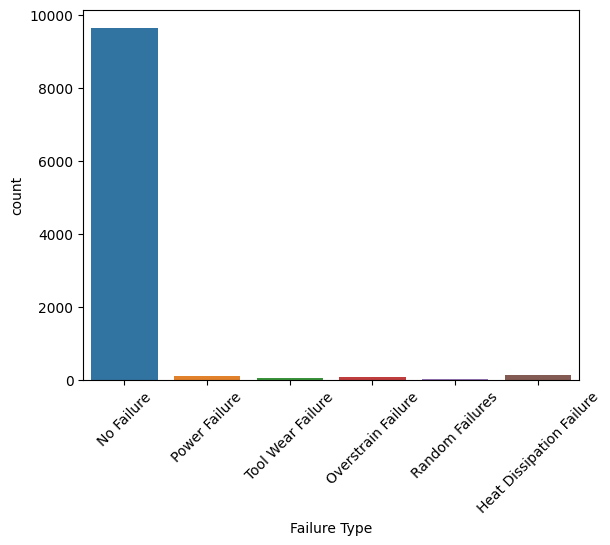

In [9]:
sns.countplot(x = df1['Failure Type'])
plt.xticks(rotation=45)
plt.show()

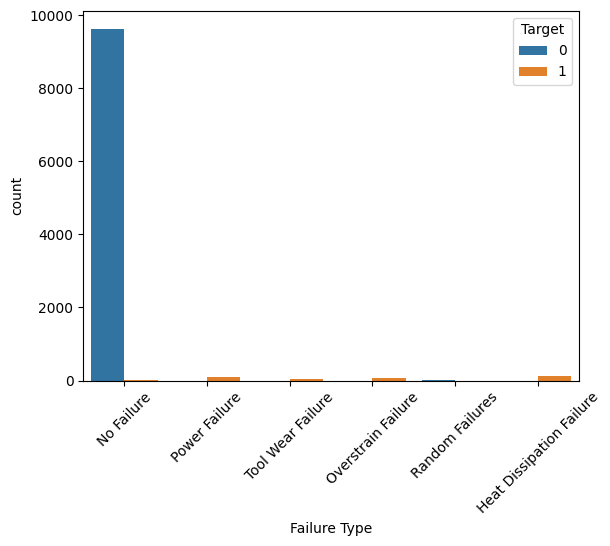

In [10]:
sns.countplot(x = df1['Failure Type'], hue = df1['Target'])
plt.xticks(rotation=45)
plt.show()

In [11]:
dff = df1[df1['Failure Type']==1]
dff_adm = dff[dff['Target']==0]
dff_adm['UDI'].mean()

nan

In [12]:
df1.groupby(['Failure Type', 'Target'])['Target'].count()

Failure Type              Target
Heat Dissipation Failure  1          112
No Failure                0         9643
                          1            9
Overstrain Failure        1           78
Power Failure             1           95
Random Failures           0           18
Tool Wear Failure         1           45
Name: Target, dtype: int64

In [13]:
df1.groupby(['Failure Type'])['Target'].value_counts()

Failure Type              Target
Heat Dissipation Failure  1          112
No Failure                0         9643
                          1            9
Overstrain Failure        1           78
Power Failure             1           95
Random Failures           0           18
Tool Wear Failure         1           45
Name: count, dtype: int64

In [14]:
df1['Target'].value_counts()

Target
0    9661
1     339
Name: count, dtype: int64

In [15]:
df1 = df1.drop('Product ID', axis=1)
df1 = df1.drop('UDI',axis=1)

In [16]:
df1['Type'].value_counts()

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64

In [17]:
df1

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,H,299.0,308.7,1408,48.5,25,0,No Failure


In [18]:
df1['Failure Type'].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

In [19]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [20]:
cat_col = ['Type','Failure Type']
le = preprocessing.LabelEncoder()
for i in cat_col:
    df1[i] = le.fit_transform(df1[i])

In [21]:
df1

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,2,298.1,308.6,1551,42.8,0,0,1
1,1,298.2,308.7,1408,46.3,3,0,1
2,1,298.1,308.5,1498,49.4,5,0,1
3,1,298.2,308.6,1433,39.5,7,0,1
4,1,298.2,308.7,1408,40.0,9,0,1
...,...,...,...,...,...,...,...,...
9995,2,298.8,308.4,1604,29.5,14,0,1
9996,0,298.9,308.4,1632,31.8,17,0,1
9997,2,299.0,308.6,1645,33.4,22,0,1
9998,0,299.0,308.7,1408,48.5,25,0,1


In [22]:
df1['Type'].value_counts()

Type
1    6000
2    2997
0    1003
Name: count, dtype: int64

In [23]:
df1['Failure Type'].value_counts()

Failure Type
1    9652
0     112
3      95
2      78
5      45
4      18
Name: count, dtype: int64

In [24]:
corr = df1.corr()
corr

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
Type,1.000000,0.017599,0.013444,-0.002693,0.004011,-0.003930,-0.005152,-0.008249
Air temperature [K],0.017599,1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556,-0.025327
Process temperature [K],0.013444,0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946,-0.004600
Rotational speed [rpm],-0.002693,0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188,0.079407
Torque [Nm],0.004011,-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321,0.031737
Tool wear [min],-0.003930,0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448,0.111619
Target,-0.005152,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000,0.470541
Failure Type,-0.008249,-0.025327,-0.004600,0.079407,0.031737,0.111619,0.470541,1.000000


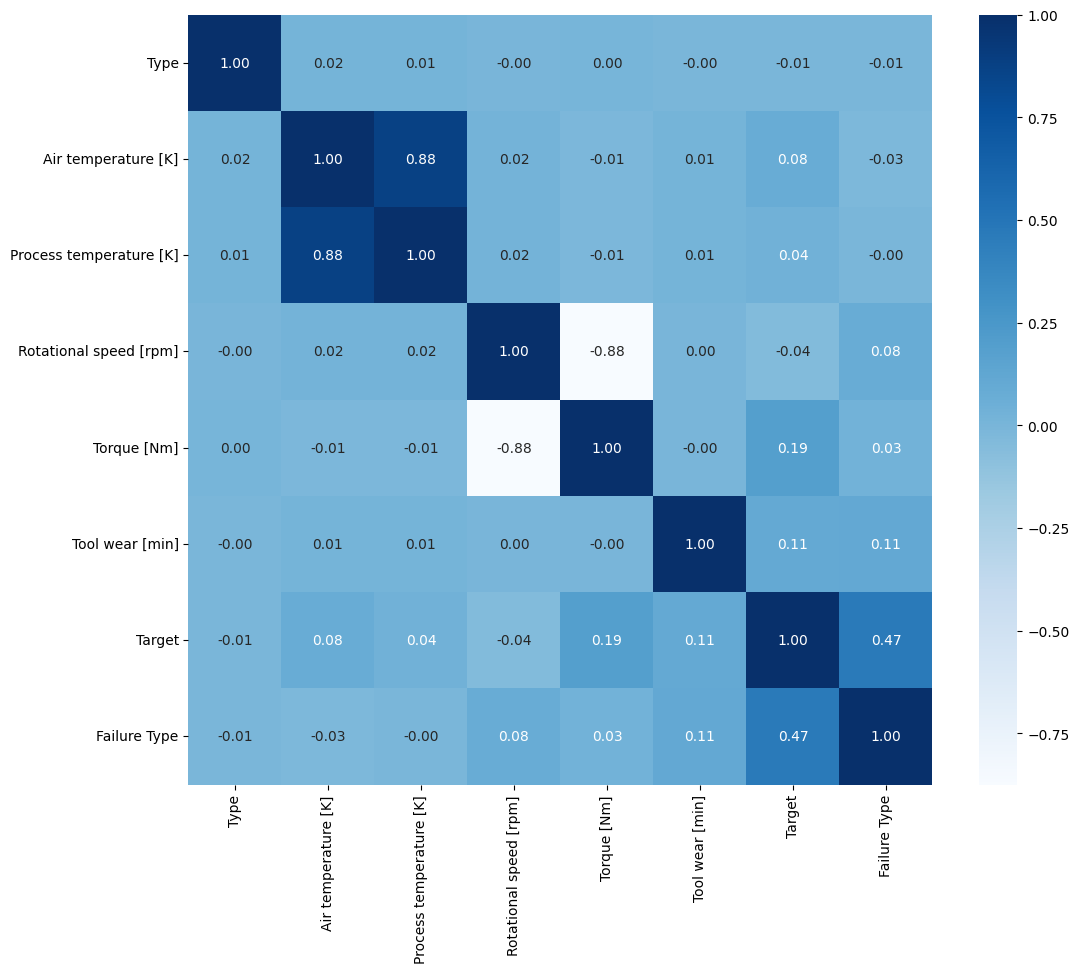

In [25]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Blues')
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [27]:
#Model building

x = df1.drop('Target', axis=1)
y = df1['Target']

In [28]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.30, random_state = 30)

In [29]:
import statsmodels.api as sm

In [30]:
model = LogisticRegression()

In [31]:
model.fit(xtrain,ytrain)

LogisticRegression()

In [32]:
y_pred = model.predict(xtest)

In [33]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [34]:
accuracy = accuracy_score(ytest, y_pred)
conf_matrix = confusion_matrix(ytest, y_pred)
class_report = classification_report(ytest, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.9793333333333333
Confusion Matrix:
[[2889    7]
 [  55   49]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2896
           1       0.88      0.47      0.61       104

    accuracy                           0.98      3000
   macro avg       0.93      0.73      0.80      3000
weighted avg       0.98      0.98      0.98      3000



In [35]:
!pip install tensorflow

In [36]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [37]:
#Model building

X = df1.drop('Target', axis=1)
Y = df1['Target']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
model = keras.Sequential([
    layers.Dense(units=128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=1, activation='sigmoid')])

In [42]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [43]:
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10


200/200 [==============================] - 2s 3ms/step - loss: 0.1421 - accuracy: 0.9689 - val_loss: 0.0444 - val_accuracy: 0.9881
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.0273 - accuracy: 0.9947 - val_loss: 0.0215 - val_accuracy: 0.9969
Epoch 3/10
200/200 [==============================] - 0s 2ms/step - loss: 0.0171 - accuracy: 0.9972 - val_loss: 0.0176 - val_accuracy: 0.9969
Epoch 4/10
200/200 [==============================] - 0s 2ms/step - loss: 0.0126 - accuracy: 0.9977 - val_loss: 0.0160 - val_accuracy: 0.9975
Epoch 5/10
200/200 [==============================] - 0s 2ms/step - loss: 0.0113 - accuracy: 0.9980 - val_loss: 0.0153 - val_accuracy: 0.9975
Epoch 6/10
200/200 [==============================] - 0s 2ms/step - loss: 0.0106 - accuracy: 0.9984 - val_loss: 0.0154 - val_accuracy: 0.9975
Epoch 7/10
200/200 [==============================] - 0s 2ms/step - loss: 0.0106 - accuracy: 0.9981 - val_loss: 0.0149 - val_accuracy: 0.9975
Epoc

In [44]:
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

63/63 [==============================] - 0s 1ms/step


In [45]:
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.9945
Confusion Matrix:
[[1939    0]
 [  11   50]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1939
           1       1.00      0.82      0.90        61

    accuracy                           0.99      2000
   macro avg       1.00      0.91      0.95      2000
weighted avg       0.99      0.99      0.99      2000

